In [1]:
#!pip install pycaret

from pycaret.utils import version
version()

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

1.0.0


In [30]:
train = pd.read_csv("../data/loan_prediction_train.csv")

train.drop(['Loan_ID'], inplace = True,axis =1)

In [31]:
print(train.shape)
train.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
# import the classification module 
from pycaret import classification

#### Initializing the Setup:
In this step, PyCaret performs some basic preprocessing tasks, like ignoring the IDs and Date Columns, imputing the missing values, encoding the categorical variables, and splitting the dataset into the train-test split for the rest of the modeling steps. When you run the setup function, it will first confirm the data types, and then if you press enter, it will create the environment for you to go ahead

In [33]:
# setup the environment 
classification_setup = classification.setup(data= train, target='Loan_Status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2164
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(614, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7209,0.7007,0.7586,0.8148,0.7857,0.3872
1,0.6744,0.6108,0.7931,0.7419,0.7667,0.2302
2,0.6744,0.6478,0.7241,0.7778,0.7500,0.2850
3,0.6977,0.6281,0.8276,0.7500,0.7869,0.2712
4,0.7674,0.7462,0.8000,0.8571,0.8276,0.4717
5,0.7442,0.7513,0.7333,0.8800,0.8000,0.4532
6,0.6744,0.6141,0.7667,0.7667,0.7667,0.2282
7,0.6744,0.5923,0.8000,0.7500,0.7742,0.1930
8,0.7907,0.7628,0.8333,0.8621,0.8475,0.5144
9,0.7857,0.8024,0.7586,0.9167,0.8302,0.5468


In [35]:
# build the xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7442,0.7906,0.9310,0.7500,0.8308,0.3310
1,0.7209,0.6601,0.9655,0.7179,0.8235,0.2205
2,0.7442,0.6970,0.8966,0.7647,0.8254,0.3582
3,0.7674,0.5936,1.0000,0.7436,0.8529,0.3505
4,0.8140,0.7923,0.8667,0.8667,0.8667,0.5590
5,0.8140,0.7538,0.9000,0.8438,0.8710,0.5389
6,0.7907,0.8179,0.9667,0.7838,0.8657,0.4145
7,0.8140,0.7103,0.9333,0.8235,0.8750,0.5169
8,0.8372,0.7667,0.9333,0.8485,0.8889,0.5871
9,0.9048,0.9708,1.0000,0.8788,0.9355,0.7565


#### Hyperparameter Tuning
We can tune the hyperparameters of a machine learning model by just using the tune_model function which takes one parameter – the model abbreviation string (the same as we used in the create_model function).

PyCaret provides us a lot of flexibility. For example, we can define the number of folds using the fold parameter within the tune_model function. Or we can change the number of iterations using the n_iter parameter. Increasing the n_iter parameter will obviously increase the training time but will give a much better performance.

Let’s train a tuned CatBoost model:

In [36]:
%%time
tune_catboost = classification.tune_model('catboost',n_iter=50, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7674,0.7833,0.9310,0.7714,0.8438,0.4044
1,0.6977,0.6847,0.8621,0.7353,0.7937,0.2415
2,0.6744,0.6379,0.8276,0.7273,0.7742,0.1995
3,0.7209,0.7266,0.9310,0.7297,0.8182,0.2543
4,0.8372,0.8538,0.9333,0.8485,0.8889,0.5871
5,0.8837,0.8385,0.9333,0.9032,0.9180,0.7182
6,0.7907,0.7949,0.8667,0.8387,0.8525,0.4928
7,0.7442,0.6872,0.9000,0.7714,0.8308,0.3194
8,0.9070,0.8974,1.0000,0.8824,0.9375,0.7584
9,0.8333,0.9443,0.8621,0.8929,0.8772,0.6182


Let’s train a boosting ensemble model here. It will also return a table with k-fold cross-validated scores of common evaluation metrics:

In [37]:
# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7209,0.7007,0.7586,0.8148,0.7857,0.3872
1,0.6279,0.5764,0.7241,0.7241,0.7241,0.1527
2,0.6512,0.6305,0.6897,0.7692,0.7273,0.2474
3,0.7209,0.6453,0.8621,0.7576,0.8065,0.3138
4,0.7209,0.6910,0.7667,0.8214,0.7931,0.3661
5,0.8140,0.8013,0.8333,0.8929,0.8621,0.5774
6,0.6279,0.6026,0.6667,0.7692,0.7143,0.1887
7,0.6977,0.6308,0.8000,0.7742,0.7869,0.2674
8,0.7674,0.7462,0.8000,0.8571,0.8276,0.4717
9,0.7381,0.7467,0.7241,0.8750,0.7925,0.4460


Another very famous ensembling technique is blending. You just need to pass the models that you have created in a list of the blend_models function.

That’s it! You just need to write a single line of code in PyCaret to do most of the stuff.

In [38]:
# Ensemble: blending
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6977,0.0,0.7241,0.8077,0.7636,0.3477
1,0.6744,0.0,0.7931,0.7419,0.7667,0.2302
2,0.6744,0.0,0.6897,0.8000,0.7407,0.3096
3,0.6977,0.0,0.8276,0.7500,0.7869,0.2712
4,0.7674,0.0,0.7667,0.8846,0.8214,0.4929
5,0.7209,0.0,0.7000,0.8750,0.7778,0.4150
6,0.7209,0.0,0.7667,0.8214,0.7931,0.3661
7,0.7209,0.0,0.8000,0.8000,0.8000,0.3385
8,0.7674,0.0,0.8000,0.8571,0.8276,0.4717
9,0.7857,0.0,0.7586,0.9167,0.8302,0.5468


In [39]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.802100,0.750200,0.956400,0.799800,0.869600,0.474500
1,Logistic Regression,0.799800,0.775400,0.952800,0.798600,0.867700,0.470000
2,Ridge Classifier,0.799800,0.000000,0.956400,0.798000,0.868400,0.466300
3,CatBoost Classifier,0.797500,0.757900,0.932400,0.807200,0.864000,0.476100
4,Extreme Gradient Boosting,0.795100,0.755300,0.939300,0.802100,0.863500,0.463300
5,Ada Boost Classifier,0.792800,0.709100,0.909000,0.815600,0.858000,0.479200
6,Naive Bayes,0.788200,0.744900,0.929500,0.800300,0.858000,0.450100
7,Gradient Boosting Classifier,0.781100,0.746000,0.912200,0.803300,0.852200,0.438200
8,Light Gradient Boosting Machine,0.774100,0.756000,0.888400,0.807300,0.844300,0.437000
9,Extra Trees Classifier,0.764800,0.735900,0.874400,0.805100,0.836400,0.419300


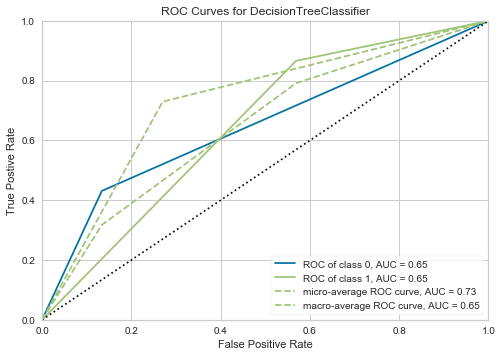

In [12]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')

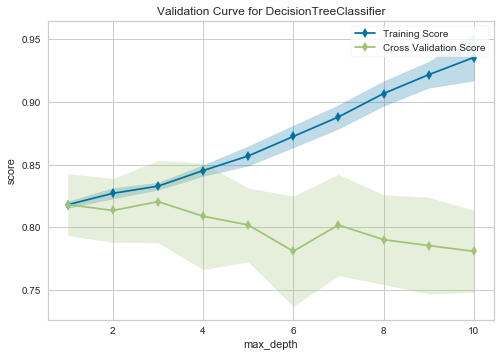

In [13]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

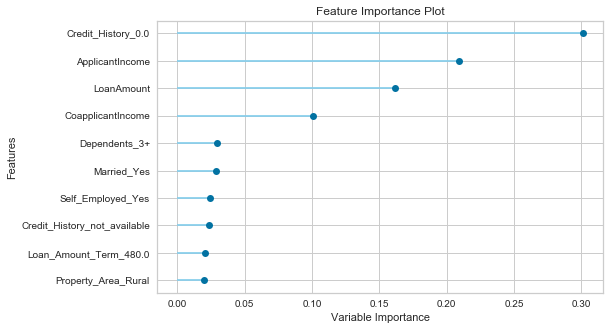

In [43]:
# Dimension Learning
classification.plot_model(classification_dt, plot = 'feature')

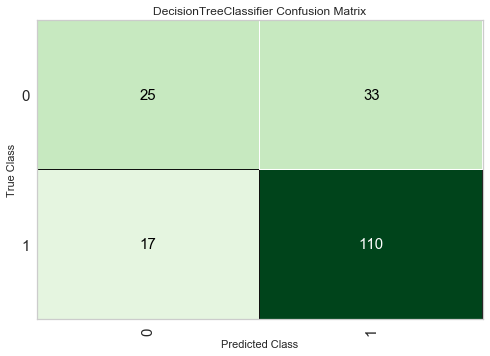

In [15]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

#### Evaluate our Model
If you do not want to plot all these visualizations individually, then the PyCaret library has another amazing function – evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways:

In [44]:
# evaluate model
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### Interpret our Model
Interpreting complex models is very important in most machine learning projects. It helps in debugging the model by analyzing what the model thinks is important. In PyCaret, this step is as simple as writing interpret_model to get the Shapley values.

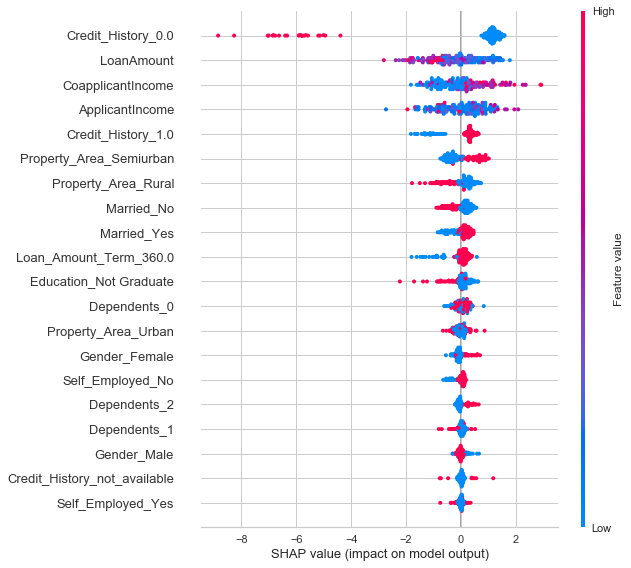

In [53]:
classification.interpret_model(tune_catboost)

#### Time to Make Predictions!
Finally, we will make predictions on unseen data. For this, we just need to pass the model that we will use for the predictions and the dataset. Make sure it is in the same format as we provided while setting up the environment earlier. PyCaret builds a pipeline of all the steps and will pass the unseen data into the pipeline and give us the results.

Let’s see how to predict the labels on unseen data:

In [54]:
test = pd.read_csv('../data/loan_prediction_test.csv')

In [55]:
predictions = classification.predict_model(tune_catboost, data=test)

In [56]:
predictions.Label.value_counts()

1    286
0     81
Name: Label, dtype: int64

In [57]:
output = predictions[['Loan_ID','Label']]
output['Loan_Status'] = np.where(output['Label'] == 1 , 'Y', 'N')
output.drop('Label',inplace =True, axis =1)
output.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [58]:
output.to_csv("../predictions/pycaret_predictions.csv", index=False)

In [59]:
classification.save_model(classification_dt, '../models/pycaret_model_1')

Transformation Pipeline and Model Succesfully Saved
